<a href="https://colab.research.google.com/github/Ashugujjar3/Tweet_emotion-detector/blob/main/Tweet_emotion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Step 1 : Load and Split Dataset

In [6]:
# Load the file
train_df = pd.read_csv("train.txt", header=None, names=["raw"])

# Split by semicolon
train_df[['text','label']] = train_df['raw'].str.split(';', expand=True)

train_df.drop(columns=['raw'], inplace=True)
train_df.head()


,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
test_df = pd.read_csv("test.txt", header=None, names=["raw"])
test_df[['text','label']] = test_df['raw'].str.split(';', expand=True)
test_df.drop(columns=['raw'], inplace=True)

val_df = pd.read_csv("val.txt", header=None, names=["raw"])
val_df[['text','label']] = val_df['raw'].str.split(';', expand=True)
val_df.drop(columns=['raw'], inplace=True)

## Step 3: Preprocess text (apply same function to all sets)

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'@\w+', '', text)   # remove mentions
    text = re.sub(r'#\w+', '', text)   # remove hashtags
    text = re.sub(r'http\S+', '', text) # remove links
    text = re.sub(r'[^A-Za-z ]+', '', text) # keep only letters
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in STOPWORDS])
    return text

for df in [train_df, test_df, val_df]:
    df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Step 4: Vectorize text with TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(train_df['clean_text'])
X_test  = tfidf.transform(test_df['clean_text'])
X_val   = tfidf.transform(val_df['clean_text'])

y_train = train_df['label']
y_test  = test_df['label']
y_val   = val_df['label']


## Step 5: Train models (Naive Bayes & Logistic Regression)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


## Step 6: Evaluate


Model: Naive Bayes
Accuracy: 0.7545

Classification Report:
               precision    recall  f1-score   support

       anger       0.95      0.53      0.68       275
        fear       0.90      0.49      0.64       224
         joy       0.71      0.98      0.83       695
        love       0.97      0.23      0.37       159
     sadness       0.73      0.93      0.82       581
    surprise       1.00      0.02      0.03        66

    accuracy                           0.75      2000
   macro avg       0.88      0.53      0.56      2000
weighted avg       0.80      0.75      0.72      2000



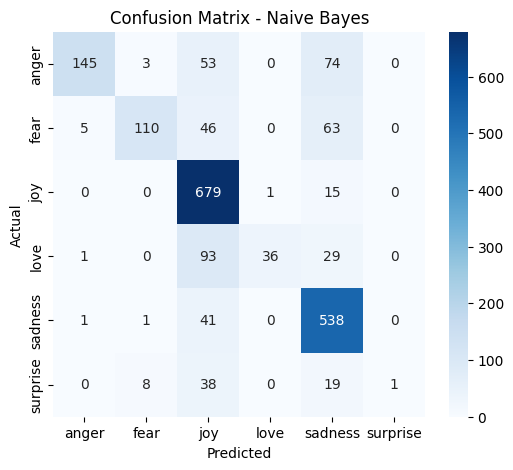


Model: Logistic Regression
Accuracy: 0.869

Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.84      0.86       275
        fear       0.87      0.81      0.84       224
         joy       0.85      0.95      0.90       695
        love       0.82      0.62      0.70       159
     sadness       0.90      0.92      0.91       581
    surprise       0.87      0.50      0.63        66

    accuracy                           0.87      2000
   macro avg       0.86      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



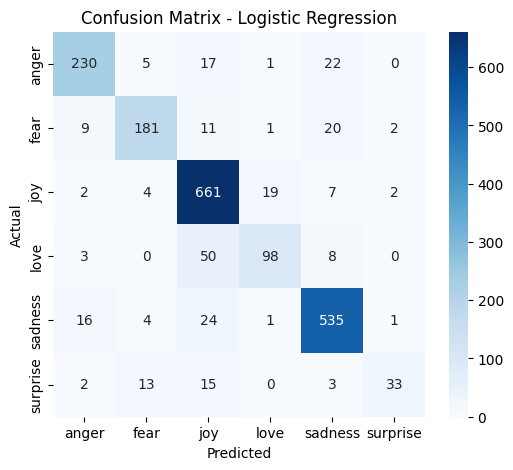

In [12]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


## Step 7: Validate with val.txt


Model: Naive Bayes (Validation)
Accuracy: 0.7485

Classification Report:
               precision    recall  f1-score   support

       anger       0.96      0.56      0.71       275
        fear       0.90      0.45      0.60       212
         joy       0.72      0.97      0.83       704
        love       0.97      0.18      0.30       178
     sadness       0.71      0.95      0.81       550
    surprise       1.00      0.11      0.20        81

    accuracy                           0.75      2000
   macro avg       0.88      0.54      0.58      2000
weighted avg       0.80      0.75      0.71      2000



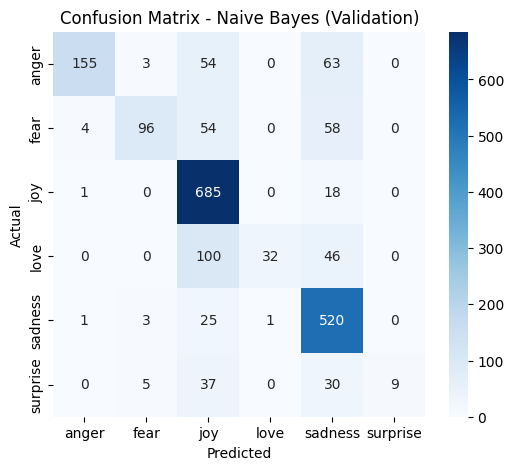


Model: Logistic Regression (Validation)
Accuracy: 0.878

Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.84      0.87       275
        fear       0.85      0.77      0.81       212
         joy       0.87      0.95      0.91       704
        love       0.89      0.73      0.80       178
     sadness       0.88      0.94      0.91       550
    surprise       0.86      0.60      0.71        81

    accuracy                           0.88      2000
   macro avg       0.88      0.81      0.83      2000
weighted avg       0.88      0.88      0.88      2000



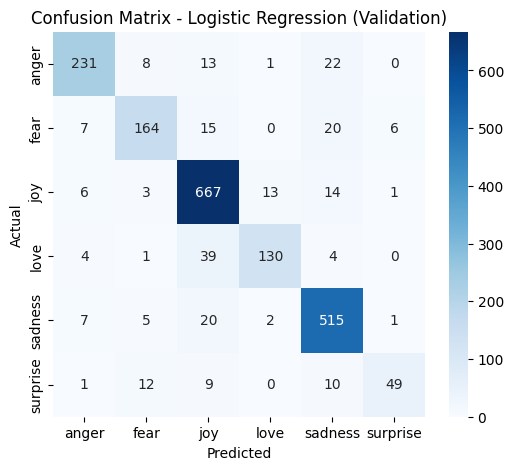

In [13]:
val_pred_nb = nb_model.predict(X_val)
val_pred_lr = lr_model.predict(X_val)

evaluate_model(y_val, val_pred_nb, "Naive Bayes (Validation)")
evaluate_model(y_val, val_pred_lr, "Logistic Regression (Validation)")
